# WEEK 5

If we want to find the minimum and maximum points of a function then we can use multivariate calculus to do this, say to optimise the parameters (the space) of a function to fit some data. First we’ll do this in one dimension and use the gradient to give us estimates of where the zero points of that function are, and then iterate in the Newton-Raphson method. Then we’ll extend the idea to multiple dimensions by finding the gradient vector, Grad, which is the vector of the Jacobian. This will then let us find our way to the minima and maxima in what is called the gradient descent method. We’ll then take a moment to use Grad to find the minima and maxima along a constraint in the space, which is the Lagrange multipliers method.

Goals：
1. Recognize the principles of gradient descent
2. Implement optimisation using multivariate calculus
3. Examine cases where the method fails to return the best solution
4. Solve gradient descent problems that are subject to a constraints using Lagrange Multipliers

### Newton-Raphson Equation

$$x_{i+1}=x_i-\frac{\partial{f(x_i)}}{\partial{f'(x_i)}}$$

**Hunt for the point where the gradient=0**

For example, we have a function: $$y=x^3-2x+2$$

And $$\frac{\partial{y}}{\partial{x}}=3x^2-2$$

We can start our guess at point $x=-2$, that is our first guess. Then use $x_{i+1}=x_i-\frac{\partial{f(x_i)}}{\partial{f'(x_i)}}$ to find out.

We can make a table starting with our initial guess that I equals naught and then we can find the gradient and the intercept and then use that to generate a new guess in this case:

|$$i$$|$$x_i$$|$$y(x_i)$$|$$\frac{\partial{y(x_i)}}{\partial{x}}$$|
|---|-----|--------|--------------------------------------|
|0  |-2   |-2      |10                                    |
|1  |-1.8 |-0.23   |7.7                                   |
|2  |-1.77|-0.005  |7.4                                   |
|3  |-1.769|$-2.3E^{-6}$|                                 |

we can find that when i=1, $\frac{\partial{y(x_i)}}{\partial{x}}$ is just a little less than i=0.

Just after 3 iterations we get an answer of $x=-2.3E^{-6}$ which is pretty neat to solve an equation. 

We try a solution and evaluate it and then generate a new guess and then evaluate that and again and again and again it's called **iteration**

But sometimes **iteration** could go wrong:

for example, if we start with $x=0$:

|$$i$$|$$x_i$$|$$y(x_i)$$|$$\frac{\partial{y(x_i)}}{\partial{x}}$$|
|---|-----|--------|--------------------------------------|
|0  |0    |2       |-2                                    |
|1  |1    |1       |1                                     |
|2  |0    |2       |                                      |

Now we are struggle with a loop.

This method is called **Newton-Raphson Method** and it's powerful to solve an equation just by evaluating it and its gradient a few times.

Let $f$ be a function with $f(r)=0$. If $f$ is continuously differentiable and its derivative is nonzero at $r$, then there exists a neighborhood of $r$ such that for all starting values $x_0$ in that neighborhood, the sequence ${x_n}$ will converge to $r$.

**If the initial value is too far from the true zero, Newton's method may fail to
converge (has only local convergence).**

**A condition for convergence of the Newton-Raphson method is: “If f′(x) and f”(x) do not change sign in the interval (x1, x*)**

### quiz-Newton-Raphson in one dimension

For example, we have a function like:

$$f(x)=\frac{x^6}{6}-3x^4-\frac{2x^3}{3}+\frac{27x^2}{2}+18x-30$$

We have a code to calculate Newton-Raphson. Firstly, try to calculate $x_0=-4$

In [3]:
import pandas as pd

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30

def d_f (x) :
  return x**5-12*x**3-2*x**2+27*x+18 # Complete this line with the derivative you have calculated.

x = -4

d = {"x" : [x], "f(x)": [f(x)]}
for i in range(0, 20):
  x = x - f(x) / d_f(x)
  d["x"].append(x)
  d["f(x)"].append(f(x))

pd.DataFrame(d, columns=['x', 'f(x)'])

,x,f(x)
0,-4.000000,7.133333e+01
1,-3.811287,1.223161e+01
2,-3.763093,6.515564e-01
3,-3.760224,2.198858e-03
4,-3.760214,2.531156e-08
5,-3.760214,1.421085e-13
6,-3.760214,4.263256e-14
7,-3.760214,4.263256e-14
8,-3.760214,4.263256e-14
9,-3.760214,4.263256e-14


Some starting points on the curve do not converge, nor do they diverge, but oscillate without settling. Try $x_0=3.1$ as a starting point; it does just this.

In [4]:
import pandas as pd

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30

def d_f (x) :
  return x**5-12*x**3-2*x**2+27*x+18 # Complete this line with the derivative you have calculated.

x = 3.1

d = {"x" : [x], "f(x)": [f(x)]}
for i in range(0, 20):
  x = x - f(x) / d_f(x)
  d["x"].append(x)
  d["f(x)"].append(f(x))

pd.DataFrame(d, columns=['x', 'f(x)'])

,x,f(x)
0,3.100000,6.535314
1,2.520603,12.111401
2,3.229808,9.238581
3,2.936525,6.180069
4,4.066617,154.951896
5,3.679109,49.438188
6,3.382626,16.458034
7,3.128862,6.916674
8,2.673781,9.466549
9,3.236206,9.443870


Again, this is behaviour that happens in areas where the curve is not well described by a straight line - therefore our initial linearisation assumption was not a good one for such a starting point.

Use the code block from previously to observe this.

In practice, often you will not need to hand craft optimisation methods, as they can be called from libraries, such as scipy. Use the code block below to test $x_0 = 3.1$

In [5]:
from scipy import optimize

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30
  
x0 = 3.1
optimize.newton(f, x0)

1.063070629709697

## Gradient Descent

Now we need to solve a function with multiple variables by using Newton-Raphson Equation. How to use the gradient to find the maxima and minima of such a function?

For example, we have a function like $$f(x,y)=x^2y$$
Now how do we find the fastest or steepest way to get down the graph?

We have already learned that you found out what the gradient of a function is with respect each of its axis, so you can find df dx just by differentiating the function f, treating all the other variables as constants. 

So in this case:

$$\frac{df}{dx}=2xy$$

$$\frac{df}{dy}=x^2$$

Here is $\nabla{f}$:$$\nabla{f}=\begin{bmatrix}\frac{df}{dx}\\\frac{df}{dy}\end{bmatrix}$$

Now calculate:

$$\begin{bmatrix}\frac{df}{dx}\\\frac{df}{dy}\end{bmatrix}\cdot\begin{bmatrix}dx\\0\end{bmatrix}$$

So, it's going to tell us how much we've gone down, that sort of how $\nabla{f}$ works. And the important thing is to remember, this is evaluated at f has some values in the space (a,b). So, it's evaluated at a location. 

So then, if we want to know how much the function will change when we move along some unit vector in an opposite direction. 

We have $$c^2+d^2=1$$
$$\hat{r}=\begin{bmatrix}c\\d\end{bmatrix}$$

$$\nabla{f}\cdot\hat{r}=\begin{bmatrix}\frac{df}{dx}\\\frac{df}{dy}\end{bmatrix}\cdot\begin{bmatrix}c\\d\end{bmatrix}$$

We call that $\nabla{f}\cdot\hat{r}$ is the direction of gradient.

So $$df=\frac{df}{dx}c+\frac{df}{dy}d$$

So, another question we can ask is, what's the maximum value this directional gradient can take?

In order to find the maximum value of the directional gradient, we want $\hat{r}$ that's actually the normalised version of $\nabla{f}$. So, we can write that down. We can do that calculation. So, we'll have $\nabla{f}$ dotted with the normalised version of itself, $\nabla{f}$ divided by its modulus. But $\nabla{f}$ dotted with itself is just equal to the sise of $\nabla{f}$ squared, got to divide by the sise.

$$\nabla{f}\cdot\frac{\nabla{f}}{||\nabla{f}||}=\frac{||\nabla{f}||^2}{||\nabla{f}||}=||\nabla{f}||$$

So, the maximum value of the directional gradient can take is just the sise of $\nabla{f}$ and that's therefore, the steepest gradient we can possibly have.

The other question is that **which way does $\nabla{f}$ point?**

And think about the way to find if it is up or down. $\frac{df}{dx}$ is positive if you're going up. So, actually $\nabla{f}$ points up the hill in the steepest way and $-\nabla{f}$ points down the hill, the steepness way. 

Now, if we have some data science problem where we want to **minimise the difference between our data values and our model fit**, then what we want to do is **find the lowest point in the function**. 

The function is kind of the badness. We want find the best so we want to **find the point where the badness is minimised**. And like Newton-Raphson, we can use the gradient to go from some trial point down towards the solution. But **in Newton-Raphson, we're trying to find the zero point**, here we don't know what the minimum value of the function is. 

So what we do is what called the **gradient descent method** is. We take a series of little steps down the "hill", and if we strat with some point $S_n$ then our next position $S_{n+1}$ is given by $S_n$ plus some little step down the hill and that little step is given by minus some amount times $\nabla{f}$.

$$S_{n+1}=S_n-\gamma\nabla{f}_{(S_n)}$$

If we overshoot, that's okay, because Grad will just take us back to the minimum. 

And notice that as the gradient gets shallower as we **come towards the turning point**, then the steps automatically get smaller because $\nabla{f}$ gets smaller.

The other thing to notice is that there are multiple local minimum on the landscape, then we might get stuck in one of them. And of course which one we find depends on our starting point. We won't find the others, we'll only find one at a time. 

## Lagrange multipliers

### Constrained optimisation

We start with the function:

$$f(x,y)=xe^{-(x^2+y^2)}$$

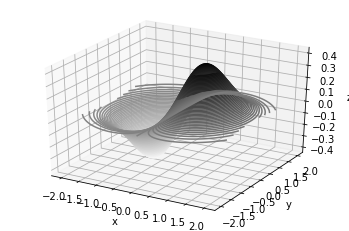

In [26]:
from mpl_toolkits import mplot3d
import numpy as np
import math as math
import matplotlib.pyplot as plt

def f(x, y):
    return x*math.e**(-1*x**2-1*y**2)

x = np.linspace(-2, 2, 250)
y = np.linspace(-2, 2, 250)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 120, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

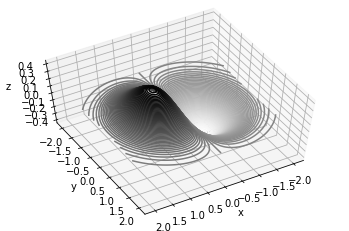

In [33]:
ax.view_init(60, 60)
fig

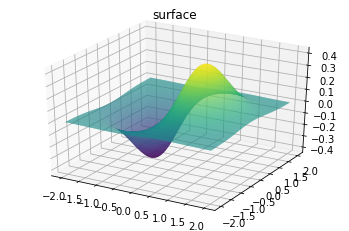

In [34]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Now let's see **the contour map** of the function:

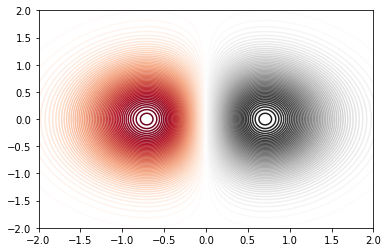

In [35]:

plt.contour(X, Y, Z, 120, cmap='RdGy');

/var/folders/wc/ddd_zsl56218ccp_8xwvvwq00000gn/T/ipykernel_17816/1089802474.py:20: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x, y, z, 10, cmap='jet', lw=2)


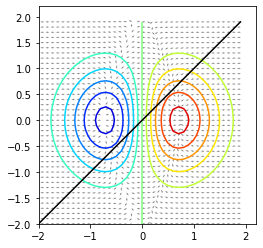

In [54]:
from matplotlib.patches import FancyArrowPatch

feature_x = np.arange(-2, 2, 0.1)
feature_y = np.arange(-2, 2, 0.1)

x, y = np.meshgrid(feature_x, feature_y)
z = x*math.e**(-1*x**2-1*y**2)
u = math.e**(-1*x**2-1*y**2)-2*x**2+math.e**(-1*x**2-1*y**2) #gradient on x
v = -2*y*x*math.e**(-1*x**2-1*y**2) #gradient on y

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)
ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, u, v, units='xy', scale=15, color='gray')
ax.contour(x, y, z, 10, cmap='jet', lw=2)

arrow = FancyArrowPatch((2,  2), (2, 2), arrowstyle='simple',
                        color='r', mutation_scale=10)  
ax.add_patch(arrow)  # NOTE: this gradient is scaled to make it better visible

**On the contour map, we can see vectors of $\nabla{f}$. These vetors are perpendicular to the contour lines and they point up the seepest gradient.**

(Think the best contour map with vectors of $\nabla{f}$ is drawn in matlab)

**Lagrange Multipliers Method**

Imagine we have a circle or something else g(x) to surround the f(x) on its contour.

And what Lagrange noticed was that **when the contour touches the path then the vector perpendicular to the contour** is in the **same direction up to a minus sign** as the vector of the path itself that's perpendicular to path. 

So if we can find $\nabla{f}$, we can find the minimum maximum points to solve the problem. 

Now suppose we have:

Maximise $$f(x,y)=x^2y$$

Constraint $$g(x)=x^2+y^2=a^2$$

We should have a solve:

$$\nabla{f}=\lambda\nabla{g}$$

where the $\lambda$ is **Lagrange Multiplier**.

All we need to do is to set up this set of equations and then solve them.

$$\nabla{f}=\nabla{x^2y}=\begin{bmatrix}2xy\\x^2\end{bmatrix}=\lambda\nabla{g}=\lambda\begin{bmatrix}2x\\2y\end{bmatrix}$$

where $\begin{bmatrix}2xy\\x^2\end{bmatrix}$ is f defferentiate with respect to x and f defferentiate with respect to y

and where $\begin{bmatrix}2x\\2y\end{bmatrix}$ is g defferentiate with respect to x and f defferentiate with respect to y

Here is the walkthrough:

Firstly, we solve these equations:

1. $2xy=\lambda2x$, so, $y=\lambda$
2. $x^2=\lambda2y$, and because $y=\lambda$, $x^2=\lambda2y=2y^2$, so $x=\pm\sqrt{2}y$
3. $x^2+y^2=a^2$, and because $x=\pm\sqrt{2}y$, $x^2+y^2=a^2=3y^2$, so $y=\pm\frac{a}{\sqrt{3}}$

Now we have solutions: $\frac{a}{\sqrt{3}}\begin{bmatrix}\sqrt{2}\\1\end{bmatrix}, \frac{a}{\sqrt{3}}\begin{bmatrix}\sqrt{2}\\-1\end{bmatrix}, \frac{a}{\sqrt{3}}\begin{bmatrix}-\sqrt{2}\\1\end{bmatrix}, \frac{a}{\sqrt{3}}\begin{bmatrix}-\sqrt{2}\\-1\end{bmatrix}$

And we have the max and min value of f(x): $\frac{2a^3}{3\sqrt{3}},-\frac{2a^3}{3\sqrt{3}},\frac{2a^3}{3\sqrt{3}},-\frac{2a^3}{3\sqrt{3}}$

max: $\frac{2a^3}{3\sqrt{3}},\frac{2a^3}{3\sqrt{3}}$

min: $-\frac{2a^3}{3\sqrt{3}},-\frac{2a^3}{3\sqrt{3}}$

What we've done here is we've used our understanding of gradients to **find the minima or maxima subject to some constraint equation** like a straight line or a circle.

A situation like this is where Lagrange multipliers come in. The observation is that the maxima and minima on the curve, will be found where the constraint is parallel to the contours of the function.

Since the gradient is perpendicular to the contours, the gradient of the function and the gradient of the constraint will also be parallel, that is,

$$\nabla{f(x)}=\lambda\nabla{g(x)}$$

If we write this out in component form, this becomes,

$$\begin{bmatrix}\frac{\partial{f}}{\partial{x}}\\\frac{\partial{f}}{\partial{y}}\end{bmatrix}=\lambda\begin{bmatrix}\frac{\partial{g}}{\partial{x}}\\\frac{\partial{g}}{\partial{y}}\end{bmatrix}$$

This equation, along with $g(\mathbf{x}) = 0$ is enough to specify the system fully. We can put all this information into a single vector equation:

$$\nabla{L(x,y,\lambda)}=\begin{bmatrix}\frac{\partial{f}}{\partial{x}}-\frac{\partial{g}}{\partial{x}}\\\frac{\partial{f}}{\partial{y}}-\frac{\partial{g}}{\partial{y}}\\-g(\mathbf{X})\end{bmatrix}=0$$

#### quiz

For example, let's consider the example of finding the minimum of the function:

$$f(x)=exp(-\frac{2x^2+y^2-xy}{2})$$

along the curve (or, subject to the constraint):

$$g(x)=x^2+3(y+1)^2-1=0$$

The function and two of the derivatives are defined for you. Set up the other two by replacing the question marks in the following code.

In [67]:
# First we define the functions,
def f (x, y) :
    return np.exp(-(2*x*x + y*y - x*y) / 2)

def g (x, y) :
    return x*x + 3*(y+1)**2 - 1

# Next their derivatives,
def dfdx (x, y) :
    return 1/2 * (-4*x + y) * f(x, y)

def dfdy (x, y) :
    return 1/2 * (x - 2*y) * f(x, y)

def dgdx (x, y) :
    return 2*x

def dgdy (x, y) :
    return 6*y+6

Next let's define the vector, $\nabla{L}$, that we are to find the zeros of; we'll call this “DL” in the code. Then we can use a pre-written root finding methodin scipy to solve.

In [68]:
from scipy import optimize

def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

(x0, y0, λ0) = (-1, -1, 0) # one of the root
(x0, y0, λ0) = (1, -2, 0) # one of the root
x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
print("x = %g" % x)
print("y = %g" % y)
print("λ = %g" % λ)
print("f(x, y) = %g" % f(x, y))

x = 0.930942
y = -1.21083
λ = -0.152319
f(x, y) = 0.114944


Here, the first two elements of the array are the x and y coordinates that we wanted to find, and the last element is the Lagrange multiplier, which we can throw away now it has been used.

Check that (x, y) does indeed solve the equation g(x, y) = 0.

You should be able to use the code find the other roots of the system.

Re-use the code above with different starting values to find the other stationary points on the constraint.

There are four in total. Give the y coordinate of any of the other solutions to two decimal places.

One of the answer is -1.21

In the previous question, you gave the yy coordinate of any of the stationary points. In this part, give the xx coordinate of the global minimum of f(x) on g(x)=0.

Give your answer to 2 decimal places.

One of the answer is 0.93